## importing libraries

In [1]:
import pandas as pd    
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier   
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  
from sklearn.preprocessing import LabelEncoder        
import matplotlib.pyplot as plt 
import seaborn as sns            


## data integration

In [2]:
import pandas as pd
import os

# List of CSV files
files = [
    'Wednesday-workingHours.pcap_ISCX.csv',
    'Tuesday-WorkingHours.pcap_ISCX.csv',
    'Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',
    'Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',
    'Monday-WorkingHours.pcap_ISCX.csv',
    'Friday-WorkingHours-Morning.pcap_ISCX.csv',
    'Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',
    'Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv'
]


In [3]:
# Load and concatenate the CSV files
combined_df = pd.concat([pd.read_csv(file) for file in files], ignore_index=True)

In [4]:
## save the combined dataframe to a new CSV file
combined_df.to_csv('combined_dataset.csv', index=False)

## reading files

In [2]:
df=pd.read_csv('combined_dataset.csv')

In [3]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [4]:
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830738,61374,61,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830739,61378,72,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830740,61375,75,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830741,61323,48,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


## explore the data

In [5]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (2830743, 79)


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max         

In [7]:
print(df.describe())

        Destination Port   Flow Duration   Total Fwd Packets  \
count       2.830743e+06    2.830743e+06        2.830743e+06   
mean        8.071483e+03    1.478566e+07        9.361160e+00   
std         1.828363e+04    3.365374e+07        7.496728e+02   
min         0.000000e+00   -1.300000e+01        1.000000e+00   
25%         5.300000e+01    1.550000e+02        2.000000e+00   
50%         8.000000e+01    3.131600e+04        2.000000e+00   
75%         4.430000e+02    3.204828e+06        5.000000e+00   
max         6.553500e+04    1.200000e+08        2.197590e+05   

        Total Backward Packets  Total Length of Fwd Packets  \
count             2.830743e+06                 2.830743e+06   
mean              1.039377e+01                 5.493024e+02   
std               9.973883e+02                 9.993589e+03   
min               0.000000e+00                 0.000000e+00   
25%               1.000000e+00                 1.200000e+01   
50%               2.000000e+00               

In [8]:
print(df.isnull().sum())

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64


In [9]:
print(df.columns)

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

## data preprocessing

In [10]:
print("Dataset Shape:", df.shape)
print("Data Types:\n", df.dtypes)


Dataset Shape: (2830743, 79)
Data Types:
  Destination Port                int64
 Flow Duration                   int64
 Total Fwd Packets               int64
 Total Backward Packets          int64
Total Length of Fwd Packets      int64
                                ...   
Idle Mean                      float64
 Idle Std                      float64
 Idle Max                        int64
 Idle Min                        int64
 Label                          object
Length: 79, dtype: object


In [11]:
df = df.drop_duplicates()#dropping duplicate columns

In [12]:
print("First 5 rows of the dataset:")
print(df.head())
print("\nLast 5 rows of the dataset:")
print(df.tail())
print("Summary Statistics:")
print(df.describe())

for column in df.columns:
    if df[column].dtype == 'object':
        print(f"Unique values in {column}: {df[column].nunique()}")
        print(f"Value counts:\n{df[column].value_counts()}\n")


First 5 rows of the dataset:
    Destination Port   Flow Duration   Total Fwd Packets  \
0                 80           38308                   1   
1                389             479                  11   
2                 88            1095                  10   
3                389           15206                  17   
4                 88            1092                   9   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        1                            6   
1                        5                          172   
2                        6                         3150   
3                       12                         3452   
4                        6                         3150   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                             6                       6   
1                           326                      79   
2                          3150                    1575   
3                  

In [13]:
print("Missing Values in Each Column:")
print(df.isnull().sum())

Missing Values in Each Column:
 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64


In [14]:
print(df.columns)

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

## data visualization

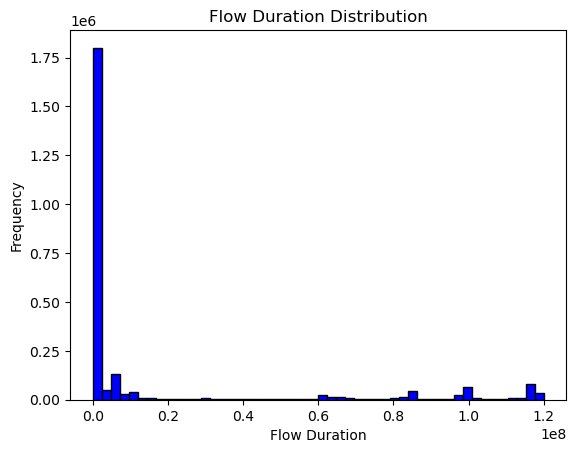

In [15]:
plt.hist(df[' Flow Duration'], bins=50, color='blue', edgecolor='black')
plt.title('Flow Duration Distribution')
plt.xlabel('Flow Duration')
plt.ylabel('Frequency')
plt.show()

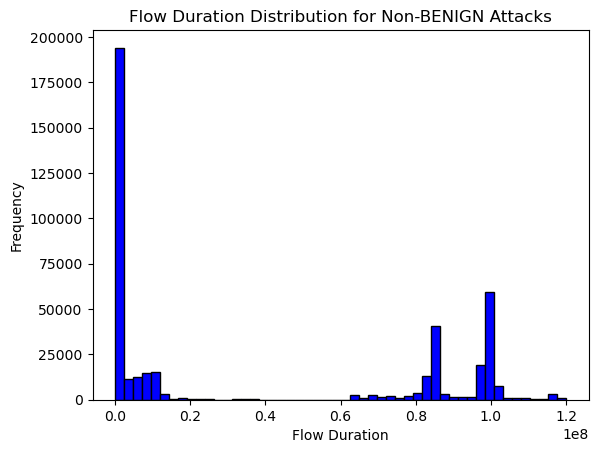

In [16]:
# Filter out rows where the 'Label' column is 'BENIGN'
filtered_dataset = df[df[' Label'] != 'BENIGN']

# Now plot the histogram of 'Flow Duration' for the filtered dataset
plt.hist(filtered_dataset[' Flow Duration'], bins=50, color='blue', edgecolor='black')
plt.title('Flow Duration Distribution for Non-BENIGN Attacks')
plt.xlabel('Flow Duration')
plt.ylabel('Frequency')
plt.show()

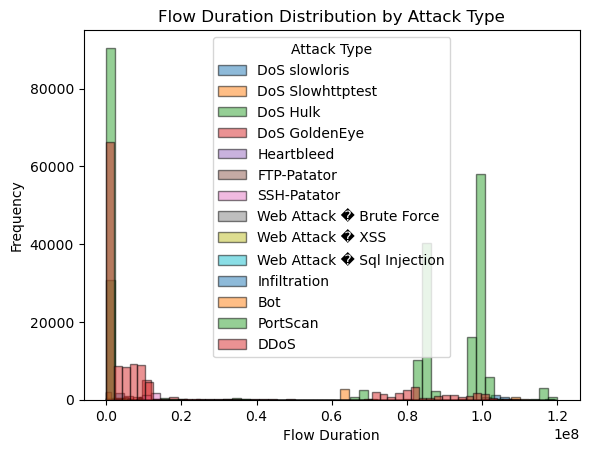

In [17]:
# Filter out the 'BENIGN' category
non_benign_data = df[df[' Label'] != 'BENIGN']

# Get unique attack types
attack_types = non_benign_data[' Label'].unique()

# Plot a histogram for each attack type
for attack in attack_types:
    subset = non_benign_data[non_benign_data[' Label'] == attack]
    plt.hist(subset[' Flow Duration'], bins=50, label=attack, alpha=0.5, edgecolor='black')

plt.title('Flow Duration Distribution by Attack Type')
plt.xlabel('Flow Duration')
plt.ylabel('Frequency')
plt.legend(title='Attack Type')
plt.show()

C:\Users\thall\AppData\Local\Temp\ipykernel_23472\3609749189.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[' Standardized Flow Duration'] = scaler.fit_transform(filtered_data[[' Flow Duration']])


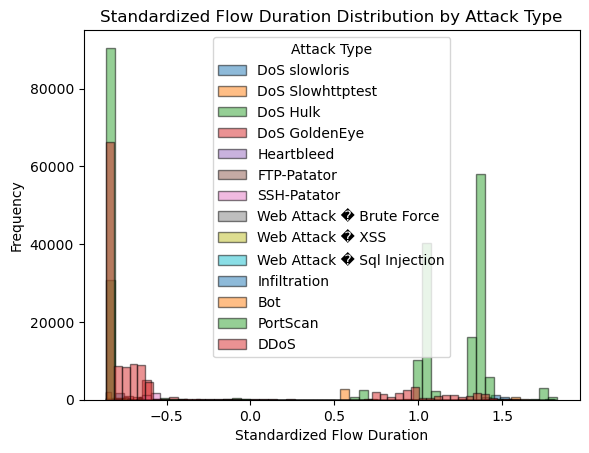

In [18]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Assuming 'df' is your DataFrame and 'Flow Duration' is the column you want to standardize

# Filter out the rows with 'BENIGN'
filtered_data = df[df[' Label'] != 'BENIGN']

# Fit the scaler on the 'Flow Duration' data and transform it
filtered_data[' Standardized Flow Duration'] = scaler.fit_transform(filtered_data[[' Flow Duration']])

# Now, you can use 'Standardized Flow Duration' for your histogram plots
# Below is your updated code with standardization applied to 'Flow Duration'

import matplotlib.pyplot as plt

# Get unique attack types
attack_types = filtered_data[' Label'].unique()

# Plot a histogram for each attack type
for attack in attack_types:
    subset = filtered_data[filtered_data[' Label'] == attack]
    plt.hist(subset[' Standardized Flow Duration'], bins=50, label=attack, alpha=0.5, edgecolor='black')

plt.title('Standardized Flow Duration Distribution by Attack Type')
plt.xlabel('Standardized Flow Duration')
plt.ylabel('Frequency')
plt.legend(title='Attack Type')
plt.show()

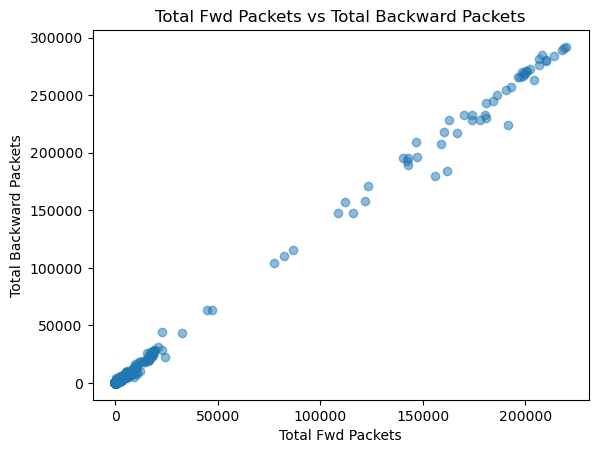

In [19]:
plt.scatter(df[' Total Fwd Packets'], df[' Total Backward Packets'], alpha=0.5)
plt.title('Total Fwd Packets vs Total Backward Packets')
plt.xlabel('Total Fwd Packets')
plt.ylabel('Total Backward Packets')
plt.show()

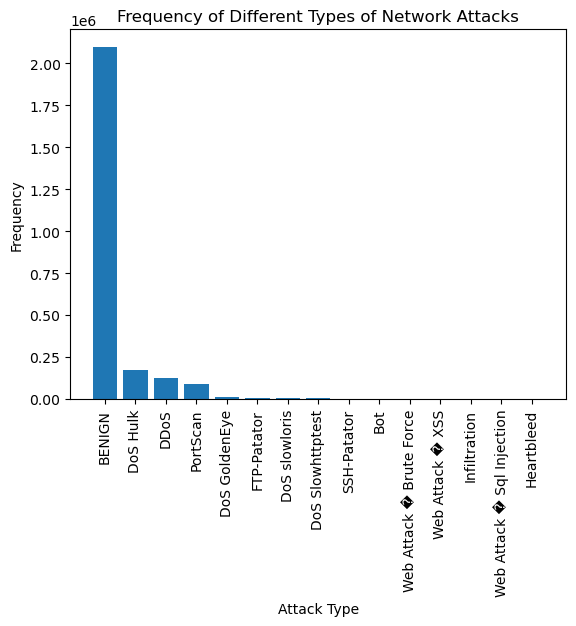

In [20]:
attack_counts = df[' Label'].value_counts()
plt.bar(attack_counts.index, attack_counts.values)
plt.title('Frequency of Different Types of Network Attacks')
plt.xlabel('Attack Type')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

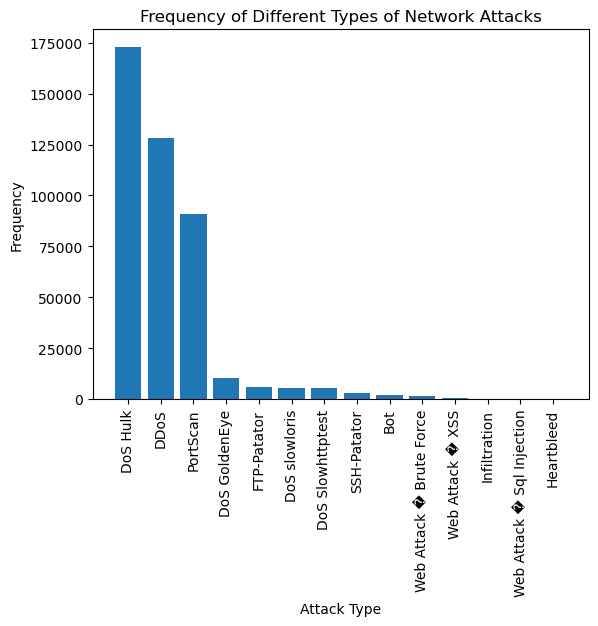

In [21]:
attack_counts = df[' Label'].value_counts()

# Remove the 'BENIGN' category from the counts
attack_counts = attack_counts[attack_counts.index != 'BENIGN']

# Now plot the bar graph without 'BENIGN'
plt.bar(attack_counts.index, attack_counts.values)
plt.title('Frequency of Different Types of Network Attacks')
plt.xlabel('Attack Type')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

## performing PCA(principle component analysis)

In [22]:
# Replace 'inf' and '-inf' with 'NaN'
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(include=['object']).columns

# Apply Label Encoding
for col in non_numeric_columns:
    df[col] = LabelEncoder().fit_transform(df[col])

X_scaled = StandardScaler().fit_transform(df)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Number of components for 96% variance
num_components_96_variance = np.argmax(cumulative_variance >= 0.96) + 1



Explained Variance Ratio by Each Component:
[2.07779998e-01 1.04341410e-01 8.52686858e-02 6.14772180e-02
 5.07066821e-02 4.26354075e-02 3.72782958e-02 3.40061591e-02
 3.26317081e-02 2.94896676e-02 2.89444752e-02 2.73054670e-02
 2.32861863e-02 2.23208223e-02 2.02194083e-02 1.84615249e-02
 1.72862577e-02 1.67132492e-02 1.50207836e-02 1.44572987e-02
 1.31242917e-02 1.25404047e-02 1.22161745e-02 1.13252627e-02
 9.19918210e-03 8.33732132e-03 6.96301810e-03 5.54744405e-03
 4.81682646e-03 4.32406129e-03 3.98962362e-03 3.35710126e-03
 2.65322900e-03 2.36988678e-03 1.73851003e-03 1.48466023e-03
 1.37107359e-03 1.17066618e-03 8.25609264e-04 6.15832901e-04
 3.82047814e-04 3.47347772e-04 2.81168684e-04 2.45294984e-04
 1.97330090e-04 1.88248592e-04 1.67906380e-04 1.09224764e-04
 1.00741639e-04 6.64669022e-05 6.29705110e-05 5.92734337e-05
 5.41774282e-05 4.03389044e-05 2.27448098e-05 2.11556929e-05
 1.46142845e-05 1.21731015e-05 1.16838865e-05 6.73259378e-06
 6.04606901e-06 1.41822624e-06 5.32890072

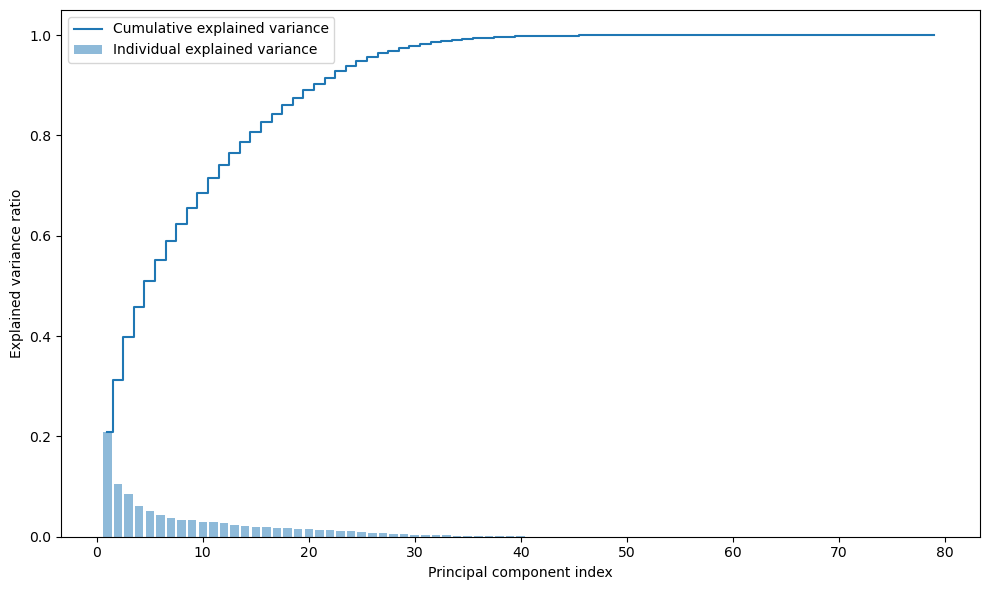

In [24]:
print("Explained Variance Ratio by Each Component:")
print(pca.explained_variance_ratio_)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative Variance Explained by Components:")
print(cumulative_variance)

num_components_96_variance = np.argmax(cumulative_variance >= 0.96) + 1
print(f"Number of components explaining at least 96% variance: {num_components_96_variance}")

import matplotlib.pyplot as plt

# Plotting the explained variance ratio
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


## model training

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(df.drop(' Label', axis=1))
y = df[' Label']


# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Training the Random Forest model
model = RandomForestClassifier(n_estimators=8, max_depth=4)
model.fit(X_train, y_train)

# Making predictions
predictions = model.predict(X_test)

scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Evaluating the model
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

print("Accuracy scores for each fold:", scores)
print("Average cross-validation score:", scores.mean())
print("Standard deviation of cross-validation score:", scores.std())


C:\Users\thall\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\thall\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99    418879
           1       0.00      0.00      0.00       403
           2       1.00      1.00      1.00     25646
           3       1.00      0.23      0.37      1995
           4       1.00      0.89      0.94     34580
           5       0.00      0.00      0.00      1099
           6       0.00      0.00      0.00      1087
           7       0.00      0.00      0.00      1196
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         9
          10       0.99      0.98      0.99     18177
          11       0.00      0.00      0.00       637
          12       0.00      0.00      0.00       307
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00       135

    accuracy                           0.98    504160
   macro avg       0.33      0.27      0.29    504160
weighted avg       0.97   

C:\Users\thall\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## model evaluation

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming `y_test` are the true labels and `predictions` are your model's predictions
overall_accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted', zero_division=1)
recall = recall_score(y_test, predictions, average='weighted', zero_division=1)
f1 = f1_score(y_test, predictions, average='weighted', zero_division=1)

print(f"Overall Accuracy: {overall_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Overall Accuracy: 0.9787
Precision: 0.9792
Recall: 0.9787
F1 Score: 0.9728


## create pickle file

In [27]:
import pickle

# Assuming `model` is your trained model (e.g., RandomForestClassifier)
# Replace 'model' with the name of your trained model variable

# Define the file name where the model will be saved
model_filename = 'cyber attack.pkl'

# Open a file to write the binary data
with open(model_filename, 'wb') as file:
    # Use pickle to save the model
    pickle.dump(model, file)

print(f"Model has been saved as {model_filename}")


Model has been saved as cyber attack.pkl
